In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
print(test_images.shape)
len(test_labels)

(10000, 28, 28)


10000

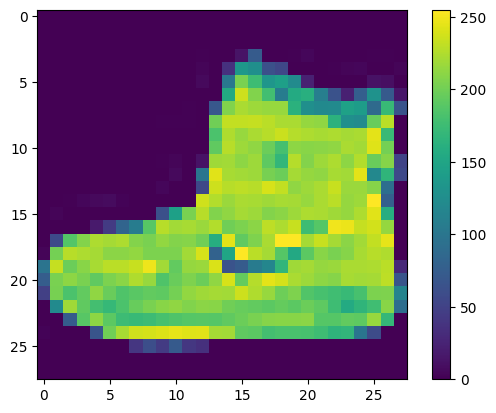

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

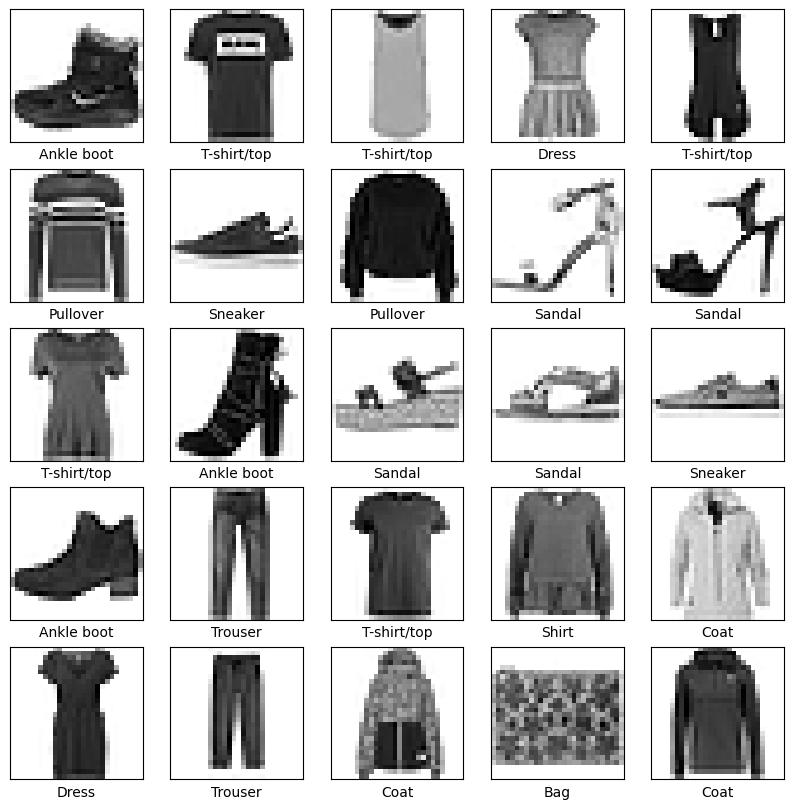

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.6843 - accuracy: 0.6824
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6755 - accuracy: 0.7649
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5843 - accuracy: 0.7944
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5396 - accuracy: 0.8111
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5180 - accuracy: 0.8239
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4958 - accuracy: 0.8292
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4917 - accuracy: 0.8339
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4831 - accuracy: 0.8357
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4733 - accuracy: 0.8383
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.470

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n",test_acc)

313/313 - 0s - loss: 0.5713 - accuracy: 0.8147 - 453ms/epoch - 1ms/step

 0.8147000074386597


In [19]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(test_images)
print("\n",predictions[0])

313/313 [==============================] - 0s 1ms/step

 [1.17631091e-14 1.09594056e-10 6.17951870e-33 4.71603529e-12
 5.08968149e-37 2.15843618e-02 2.97977522e-17 5.25478572e-02
 1.24941169e-10 9.25867736e-01]


In [23]:
np.argmax(predictions[0])

9

In [25]:
for i in range(25):
    print(class_names[np.argmax(predictions[i])])

Ankle boot
Pullover
Trouser
Trouser
Shirt
Trouser
Coat
Coat
Sandal
Sneaker
Coat
Sandal
Bag
Dress
Coat
Trouser
Pullover
Coat
Bag
T-shirt/top
Pullover
Sandal
Sneaker
Ankle boot
Trouser


In [26]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

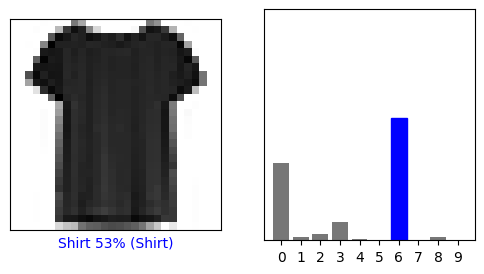

In [33]:
i = 1056
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

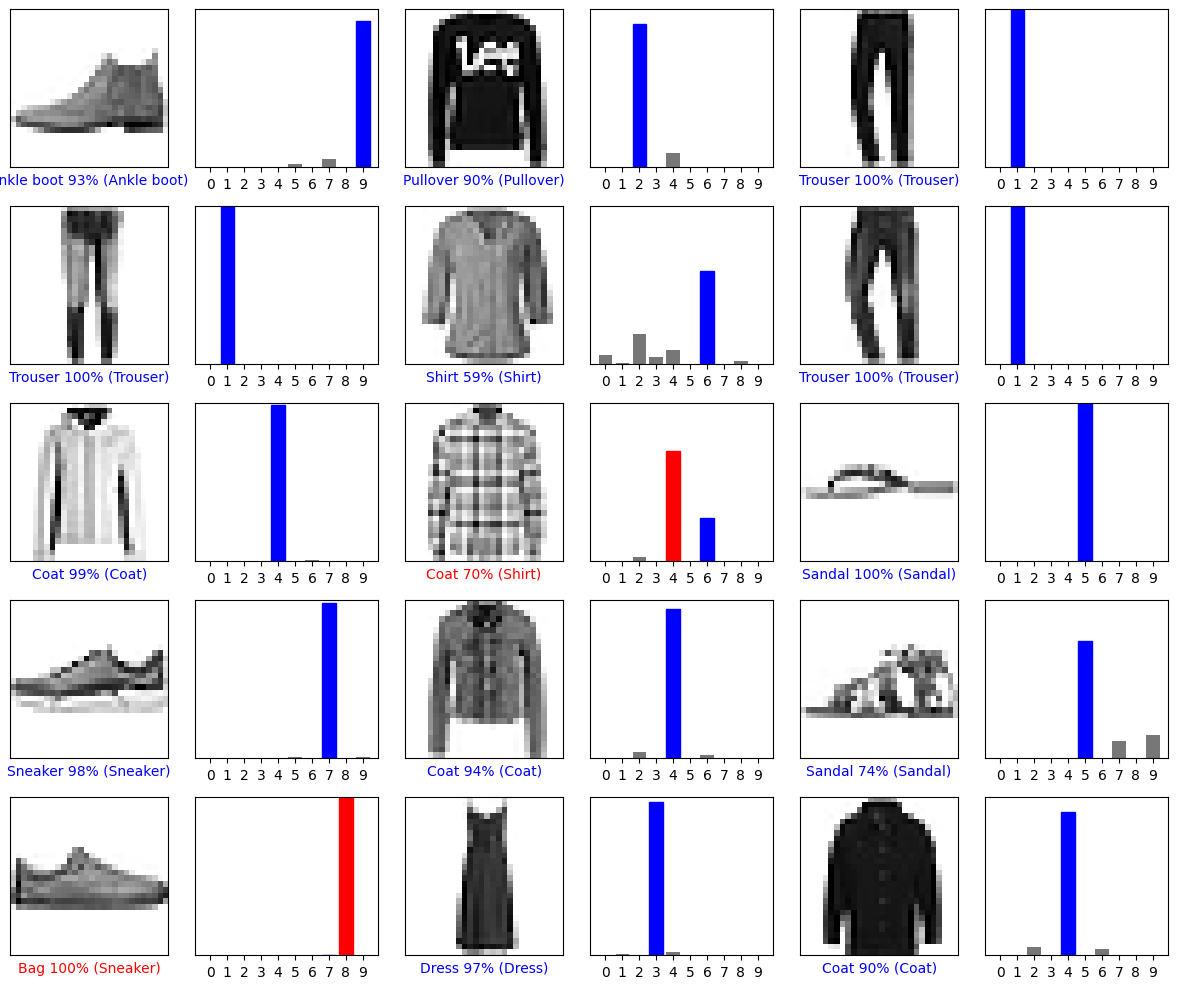

In [34]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()